In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [6]:
# This code has been generated with GPT o1, with human indications as a starting point. 

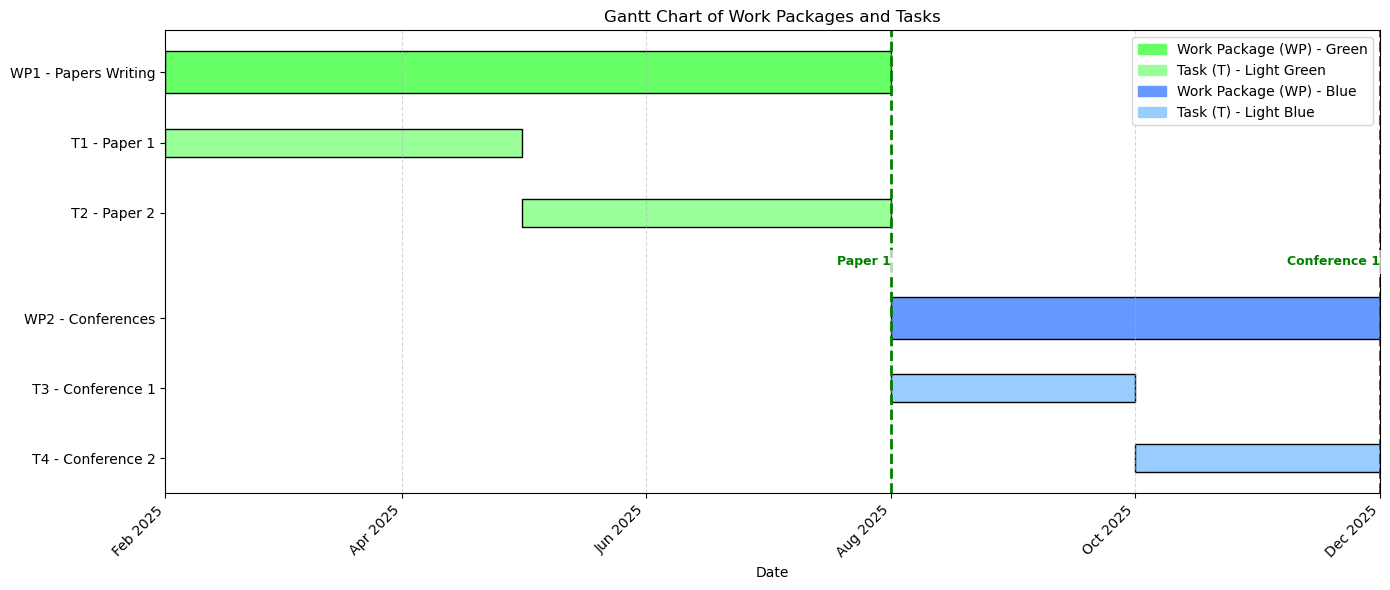

In [23]:
# Define the project start date
project_start_date = datetime(2025, 2, 1)

# Function to add months to a date
def add_months(start_date, months):
    return start_date + relativedelta(months=+months)

# Define the data with absolute start dates
workpackages = [
    {
        'id': 'WP1',
        'name': 'Papers Writing',
        'start_month': 0,           # Starts at month 0 (Feb 2025)
        'duration_months': 6,       # Duration of 6 months
        'color': '#66FF66',         # Green
        'tasks': [
            {'id': 'T1', 'name': 'Paper 1', 'start_month': 0, 'duration_months': 3, 'color': '#99FF99'},  # Light Green
            {'id': 'T2', 'name': 'Paper 2', 'start_month': 3, 'duration_months': 3, 'color': '#99FF99'}   # Light Green
        ]
    },
    {
        'id': 'WP2',
        'name': 'Conferences',
        'start_month': 6,           # Starts after WP1 completes (Aug 2025)
        'duration_months': 4,       # Duration of 4 months
        'color': '#6699FF',         # Blue
        'tasks': [
            {'id': 'T3', 'name': 'Conference 1', 'start_month': 0, 'duration_months': 2, 'color': '#99CCFF'},  # Light Blue
            {'id': 'T4', 'name': 'Conference 2', 'start_month': 2, 'duration_months': 2, 'color': '#99CCFF'}   # Light Blue
        ]
    }
]

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Calculate total number of bars (WPs + tasks)
total_bars = sum(1 + len(wp['tasks']) for wp in workpackages)

# Start y_pos from total_bars and decrement
current_y = total_bars

yticks = []
yticklabels = []

# Iterate over WPs and their tasks to plot
for wp in workpackages:
    # Calculate WP start and end dates
    wp_start = add_months(project_start_date, wp['start_month'])
    wp_end = add_months(wp_start, wp['duration_months'])
    
    # Convert dates to matplotlib's numerical format
    wp_start_num = mdates.date2num(wp_start)
    wp_end_num = mdates.date2num(wp_end)
    wp_duration = wp_end_num - wp_start_num
    
    # Plot WP
    ax.barh(current_y, wp_duration, left=wp_start_num, height=0.6, color=wp['color'], edgecolor='black')
    yticks.append(current_y)
    yticklabels.append(f"{wp['id']} - {wp['name']}")
    current_y -= 1  # Move to next y position for tasks

    # Plot tasks
    for task in wp['tasks']:
        # Calculate task start and end dates
        task_start = add_months(wp_start, task['start_month'])
        task_end = add_months(task_start, task['duration_months'])
        
        # Convert dates to matplotlib's numerical format
        task_start_num = mdates.date2num(task_start)
        task_end_num = mdates.date2num(task_end)
        task_duration = task_end_num - task_start_num
        
        # Plot task
        ax.barh(current_y, task_duration, left=task_start_num, height=0.4, color=task['color'], edgecolor='black')
        yticks.append(current_y)
        yticklabels.append(f"   {task['id']} - {task['name']}")
        current_y -= 1  # Next task

    # Add some spacing between WPs
    current_y -= 0.5

# Customize the y-axis
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
# No need to invert y-axis since higher y_pos are plotted on top

# Set labels and title
ax.set_xlabel('Date')
ax.set_title('Gantt Chart of Work Packages and Tasks')

# Format the x-axis to show dates
# Define the date format
date_format = mdates.DateFormatter('%b %Y')

# Manually define the tick dates every two months starting from Feb 2025
tick_dates = [add_months(project_start_date, i*2) for i in range(6)]  # Feb, Apr, Jun, Aug, Oct, Dec
tick_dates_num = [mdates.date2num(d) for d in tick_dates]
ax.set_xticks(tick_dates_num)
ax.xaxis.set_major_formatter(date_format)

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Create custom legend
wp_patch_green = mpatches.Patch(color='#66FF66', label='Work Package (WP) - Green')
task_patch_green = mpatches.Patch(color='#99FF99', label='Task (T) - Light Green')
wp_patch_blue = mpatches.Patch(color='#6699FF', label='Work Package (WP) - Blue')
task_patch_blue = mpatches.Patch(color='#99CCFF', label='Task (T) - Light Blue')

plt.legend(handles=[wp_patch_green, task_patch_green, wp_patch_blue, task_patch_blue],
           loc='upper right')

# Set x-axis limits based on project duration
# Project starts at Feb 2025 and lasts 10 months: until Dec 1, 2025
project_end_date = add_months(project_start_date, 10)

# Set xlim exactly from project_start_date to project_end_date
ax.set_xlim(mdates.date2num(project_start_date), 
            mdates.date2num(project_end_date))

# Add grid for better readability
ax.xaxis.grid(True, which='major', linestyle='--', alpha=0.5)

# Define deliverables
deliverables = [
    {'date': add_months(project_start_date, 6), 'name': 'Paper 1'},          # D1 at end of WP1 (Aug 1, 2025)
    {'date': add_months(project_start_date, 10), 'name': 'Conference 1'}    # D2 at end of WP2 (Dec 1, 2025)
]

# Get y-axis limits to calculate middle y
ymin, ymax = ax.get_ylim()
middle_y = (ymin + ymax) / 2

for deliv in deliverables:
    deliv_num = mdates.date2num(deliv['date'])
    # Add vertical dotted line
    ax.axvline(x=deliv_num, color='green', linestyle='--', linewidth=2)
    # Add label at the middle of the y-axis
    ax.text(deliv_num, middle_y, deliv['name'], rotation=0, color='green',
            verticalalignment='center', horizontalalignment='right', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))


# Adjust layout to prevent clipping of date labels and deliverable labels
plt.tight_layout()

# Show the plot
plt.show()
